<h1><center>
    ECE 438 - Laboratory 6a<br/>
    Discrete Fourier Transform and Fast Fourier Transform Algorithms (Week 1)<br/>
    <small>Last updated on February 22, 2022</small><br/>
    <br/>
    Date: Feb. 23, 2023<br/>
    Section: Thursday 11:30am<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Connor Davin| CJD | 1 Hr|

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding the effects of truncating the signal on its DTFT (20 pts)**: *Magnitude and phase plots, hamming/rect windows, questions*||||
|**Implementation of DFT and inverse DFT (40 pts)**: *Python codes, frequency and time-domain plots, analytical expressions*||||
|**Implementation of DFT and IDFT using matrix multiplication (30 pts)**: *Matrices A,B,C, matlab codes, plots, questions*||||
|**Computation time comparison (10 pts)**: *Runtimes, questions*||||

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [217]:
def DTFT(x, M):
    """
    Parameters:
    ---
    x: a signal which is assumed to start at time n = 0
    M: the number of output points of the DTFT
    
    Returns:
    ---
    X: the samples of the DTFT
    w: corresponding frequencies of these samples
    """
    N = max(M, len(x))
    N = int(np.power(2, np.ceil(np.log(N) / np.log(2))))
    X = np.fft.fft(x, N)
    w = np.arange(N) / N * 2 * np.pi
    w = w - 2 * np.pi * (w >= np.pi).astype(int)
    X = np.fft.fftshift(X)
    w = np.fft.fftshift(w)
    return X, w


def hanning(N):
    """
    Parameters:
    ---
    N: the length of the Hanning window

    Returns:
    ---
    w: the Hanning window of length N
    """
    n = np.arange(N)
    w = 0.5 - 0.5 * np.cos(2 * np.pi * n / (N - 1))
    return w


def hamming(N):
    """
    Parameters:
    ---
    N: the length of the Hamming window

    Returns:
    ---
    w: the Hamming window of length N
    """
    n = np.arange(N)
    w = 0.54 - 0.46 * np.cos(2 * np.pi * n / (N - 1))
    return w

In [160]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2: Windowing Effects</left></h3>

**1. Plot the magnitude of $W(e^{j\omega})$, using equations (10) and (11).**

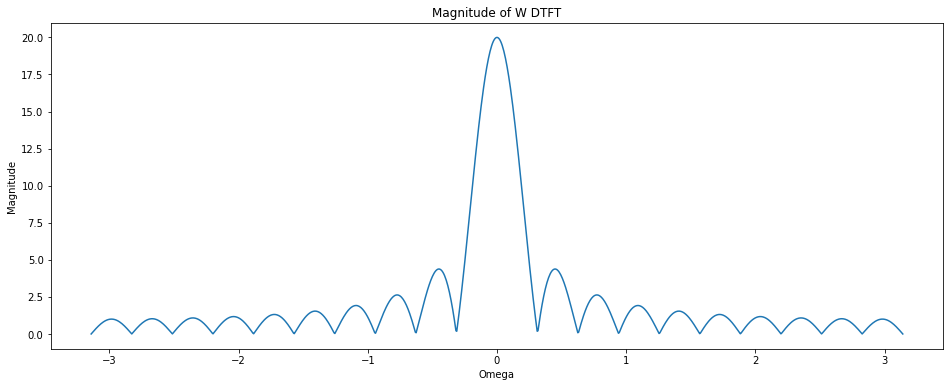

In [161]:
# insert your code here
N = 20
w = np.linspace(-np.pi, np.pi, 1000)
w_dtft = (1 - np.exp(-1j*w*N)) / (1 - np.exp(-1j*w))

plt.title("Magnitude of W DTFT")
plt.ylabel("Magnitude")
plt.xlabel("Omega")
plt.plot(w, np.abs(w_dtft))
plt.show()


**2. Plot the phase of $W(e^{j\omega})$, using equations (10) and (11).**

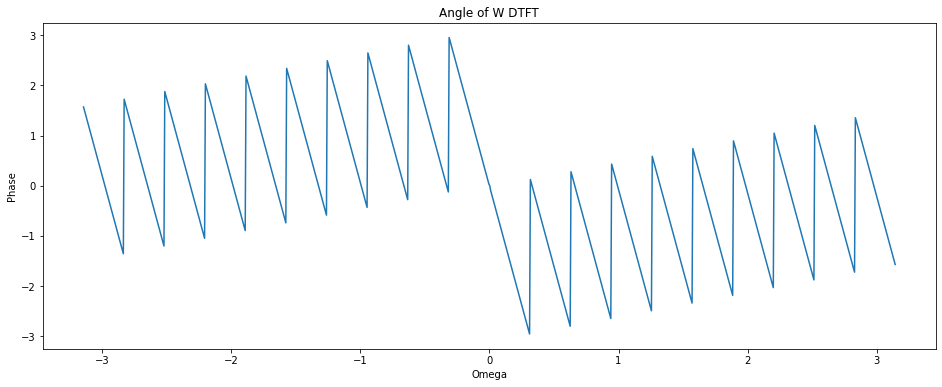

In [218]:
# insert your code here
N = 20
w = np.linspace(-np.pi, np.pi, 1000)
w_dtft = (1 - np.exp(-1j*w*N)) / (1 - np.exp(-1j*w))
w_dtft[len(w)//2] = N

plt.title("Angle of W DTFT")
plt.ylabel("Phase")
plt.xlabel("Omega")
plt.plot(w, np.angle(w_dtft))
plt.show()


**3. Determine an analytical expression for $X(e^{j\omega})$ (the DTFT of the non-truncated signal).**

X(ω) = π * rep(2π) [δ(ω - π/4) + δ(ω + π/4)]

**4. Truncate the signal $x[n]$ using a window of size $N = 20$ and then use ```DTFT``` to compute $X_{\text{tr}}(e^{j\omega})$. Then plot the magnitude of $X_{\text{tr}}(e^{j\omega})$. Make sure that the plot contains a least 512 points.**

**Hint:** Use the command ```X, w = DTFT(x, 512)```.

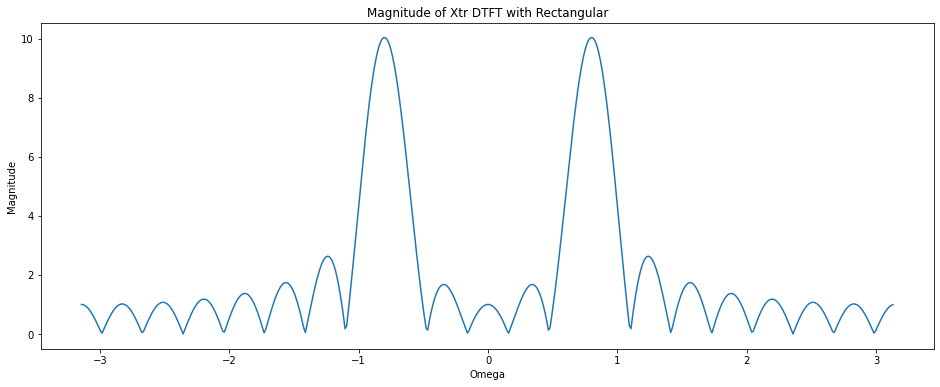

In [220]:
# insert you code here
n = np.arange(20)
xtr_n = np.cos(np.pi/4 * n)
xtr_dtft, w = DTFT(xtr_n, 512)

plt.title("Magnitude of Xtr DTFT with Rectangular")
plt.ylabel("Magnitude")
plt.xlabel("Omega")
plt.plot(w, np.abs(xtr_dtft))
plt.show()


**5. Describe the difference between $|X_{\text{tr}}(e^{j\omega})$ and $|X(e^{j\omega})|$. What is the reason for this difference?**

Within [-π, π], |X(ejω)| would have two δ(ω) at +/- π/4 
while |Xtr(ejω)| has a peak at +/- π/4, it is followed by smaller peaks as it approaches +/- π.

**6. What would you expect your plots to look like if you had used a Hamming window in place of the truncation (rectangular) window? (See Fig. 1 for a plot of a Hamming window of length 20 and its DTFT.) Submit the plot of the magnitude of the DTFT of the signal $x[n]$ windowed using a Hamming window. (Hint: The Python command for a Hamming window is `hamming(N)`.)**

Before plotting, I expect the result to resemble |X(ejω)| better. After plotting, I expected it to look like the plot we were instructed to plot in the question above. 

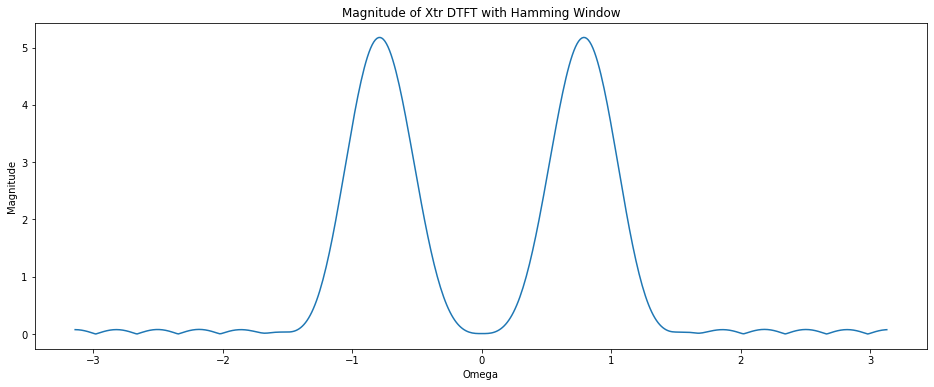

In [164]:
# insert you code here
n = np.arange(20)
xtr_n = np.cos(np.pi/4 * n) * hamming(20)
xtr_dtft, w = DTFT(xtr_n, 512)

plt.title("Magnitude of Xtr DTFT with Hamming Window")
plt.ylabel("Magnitude")
plt.xlabel("Omega")
plt.plot(w, np.abs(xtr_dtft))
plt.show()

**7. Comment on the effects of using a different window for $w[n]$.**

The hamming window mimicks the rectangular window but the result is smoother, resembling |X(ejω)| better.

<h3 style="color:red;"><left>Exercise 3.1: Computing the DFT</left></h3>

**1. Write your own Python function to implement the DFT of equation (3). Your routine should implement the DFT exactly as specified by (3) using *for-loops* for $n$ and $k$, and computing the exponentials as they appear.**

**Hint:** initialize `X` as a vector of complex values by using ```.astype(complex)```.

In [165]:
def DFTsum(x):
    """
    Parameters:
    ---
    x: the input signal, an N point vector contining the values x[0], ..., x[N - 1]
    
    Returns:
    ---
    X: the DFT of x
    """
    N = len(x)
    X = np.zeros(N).astype(complex)
    
    for k in range(N):
      for n in range(N):
        X[k] += x[n] * np.exp((-1j*2*np.pi*k*n)/N)

    return X

**2. Test your routine ```DFTsum``` by computing $X_N(k)$ for each of the following cases:**

* $x(n)=\delta(n)\quad\text{for }N=10$
* $x(n)=1\quad\text{for }N=10$
* $x(n)=e^{j2\pi n/10}\quad\text{for }N=10$
* $x(n)=\cos(2\pi n/10)\quad\text{for }N=10$

**and plot the magnitude of each of the DFT’s.**

<ipython-input-166-4ddb38da2111>:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(X_dft1))


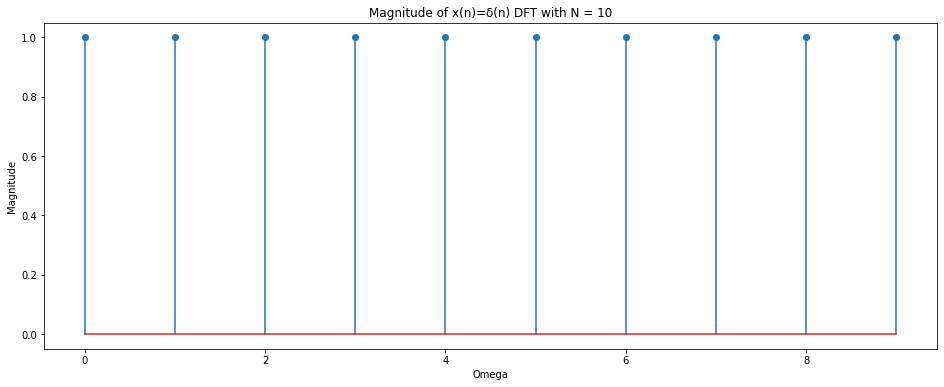

In [166]:
N = 10
n = np.linspace(0, N-1, N)
x_n1 = (n == 0).astype(float)
X_dft1 = DFTsum(x_n1)

plt.title("Magnitude of x(n)=δ(n) DFT with N = 10")
plt.ylabel("Magnitude")
plt.xlabel("Omega")
plt.stem(np.abs(X_dft1))
plt.show()

<ipython-input-167-e28fda6069f7>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(X_dft2))


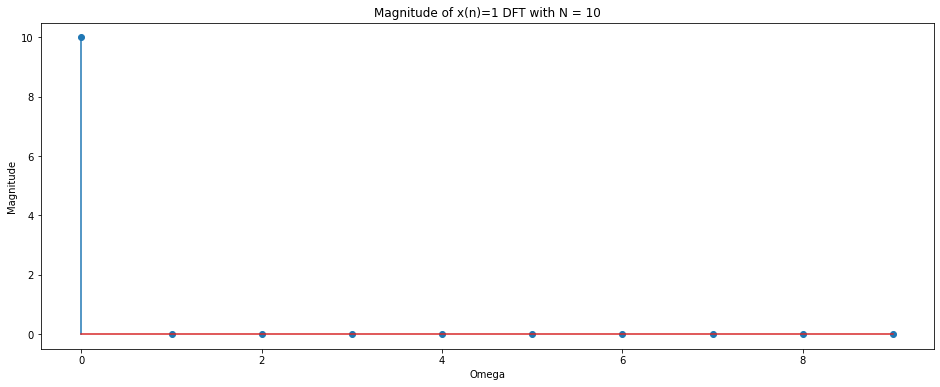

In [167]:
# second case
N = 10
n = np.linspace(0, N-1, N)
x_n2 = (n <= N-1).astype(float)
X_dft2 = DFTsum(x_n2)

plt.title("Magnitude of x(n)=1 DFT with N = 10")
plt.ylabel("Magnitude")
plt.xlabel("Omega")
plt.stem(np.abs(X_dft2))
plt.show()

<ipython-input-168-e0a062ac8191>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(X_dft3))


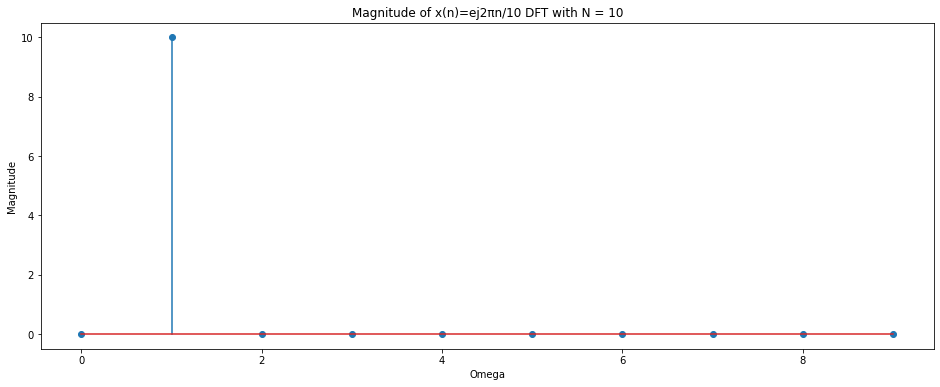

In [168]:
# third case
N = 10
n = np.linspace(0, N-1, N)
x_n3 = np.exp(1j*2*np.pi*n/10)
X_dft3 = DFTsum(x_n3)

plt.title("Magnitude of x(n)=ej2πn/10 DFT with N = 10")
plt.ylabel("Magnitude")
plt.xlabel("Omega")
plt.stem(np.abs(X_dft3))
plt.show()

(1) δ[w] + δ[w - 1] + δ[w - 2] + δ[w - 3] + δ[w - 4] + δ[w - 5] + δ[w - 6] + δ[w - 7] + δ[w - 8] + δ[w - 9]
(2) δ[w]
(3) δ[w-1]

<ipython-input-169-ede8b2b02f0d>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(X_dft4))


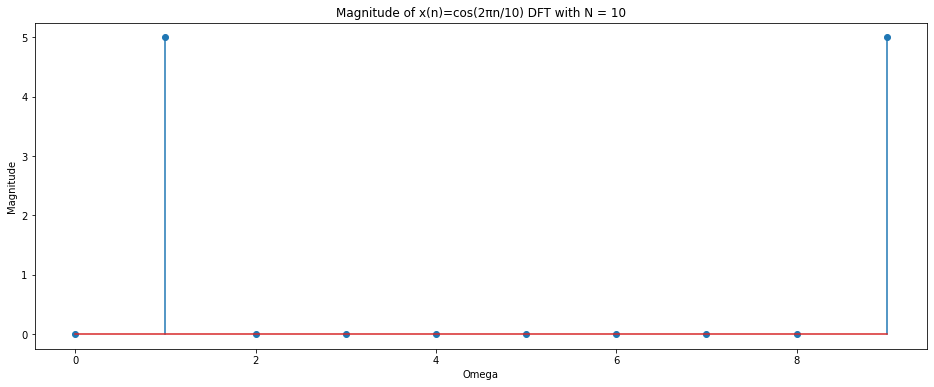

In [169]:
# fourth case
N = 10
n = np.linspace(0, N-1, N)
x_n4 = np.cos(2*np.pi*n/10)
X_dft4 = DFTsum(x_n4)

plt.title("Magnitude of x(n)=cos(2πn/10) DFT with N = 10")
plt.ylabel("Magnitude")
plt.xlabel("Omega")
plt.stem(np.abs(X_dft4))
plt.show()

**3. Derive simple closed-form analytical expressions for the DFT (not the DTFT!) of each signal.**

(1) δ[w] + δ[w - 1] + δ[w - 2] + δ[w - 3] + δ[w - 4] + δ[w - 5] + δ[w - 6] + δ[w - 7] + δ[w - 8] + δ[w - 9]

(2) 10*δ[w]

(3) 10*δ[w-1]

(4) 5*(δ[w-1] + δ[w - 9])

<h3 style="color:red;"><left>Exercise 3.2: Computing the Inverse DFT</left></h3>

**1. Write a Python function for computing the inverse DFT of (4).**

In [170]:
def IDFTsum(X):
    '''
    Parameters:
    ---
    X: the N point vector containing the DFT
    
    Returns:
    ---
    x: the corresponding time-domain signal
    '''
    N = len(X)
    x = np.zeros(N)
    
    for n in range(N):
      for k in range(N):
        x[n] += X[k] * np.exp((1j*2*np.pi*k*n)/N)
      x[n] = x[n] / N

    return x

**2. Use ```IDFTsum``` to invert each of the DFT’s computed in the previous problem. Plot the magnitudes of the inverted DFT’s, and verify that those time-domain signals match the original ones. Use ```np.real()``` to eliminate any imaginary parts which roundoff error may produce.**

<ipython-input-170-d6660ac8ebeb>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n] += X[k] * np.exp((1j*2*np.pi*k*n)/N)
<ipython-input-171-1989f9a5f38e>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(x_n1_idft))


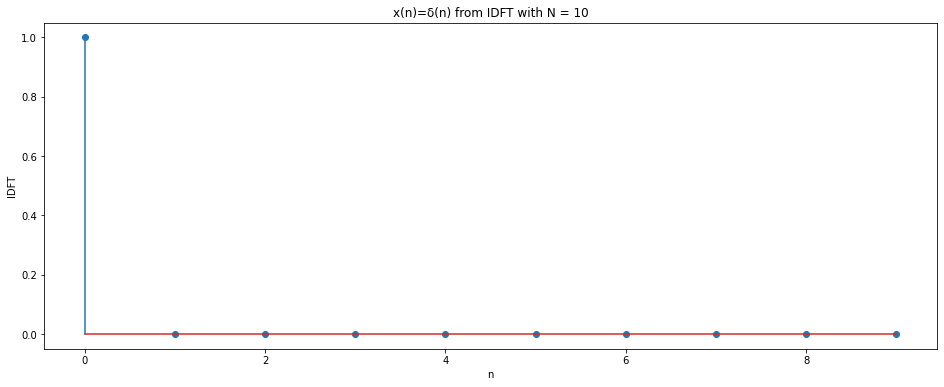

In [171]:
# insert your code here
x_n1_idft = np.real(IDFTsum(X_dft1))
plt.title("x(n)=δ(n) from IDFT with N = 10")
plt.ylabel("IDFT")
plt.xlabel("n")
plt.stem(np.abs(x_n1_idft))
plt.show()

<ipython-input-170-d6660ac8ebeb>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n] += X[k] * np.exp((1j*2*np.pi*k*n)/N)
<ipython-input-172-becf44ea2547>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(x_n2_idft))


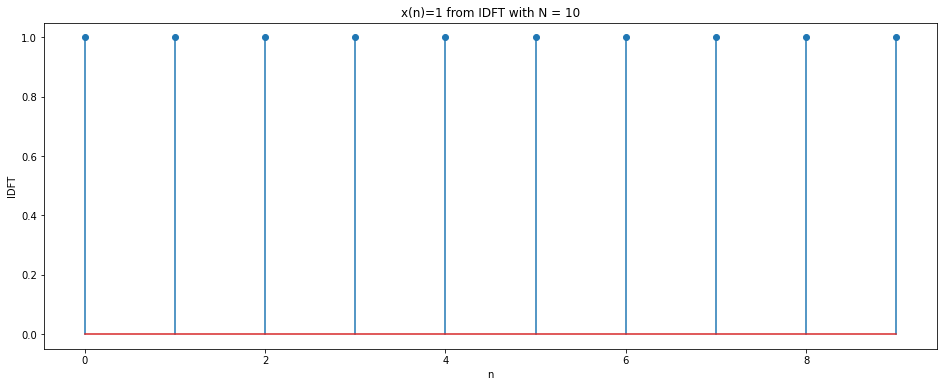

In [172]:
x_n2_idft = np.real(IDFTsum(X_dft2))
plt.title("x(n)=1 from IDFT with N = 10")
plt.ylabel("IDFT")
plt.xlabel("n")
plt.stem(np.abs(x_n2_idft))
plt.show()

<ipython-input-170-d6660ac8ebeb>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n] += X[k] * np.exp((1j*2*np.pi*k*n)/N)
<ipython-input-173-29982f54169e>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(x_n3_idft))


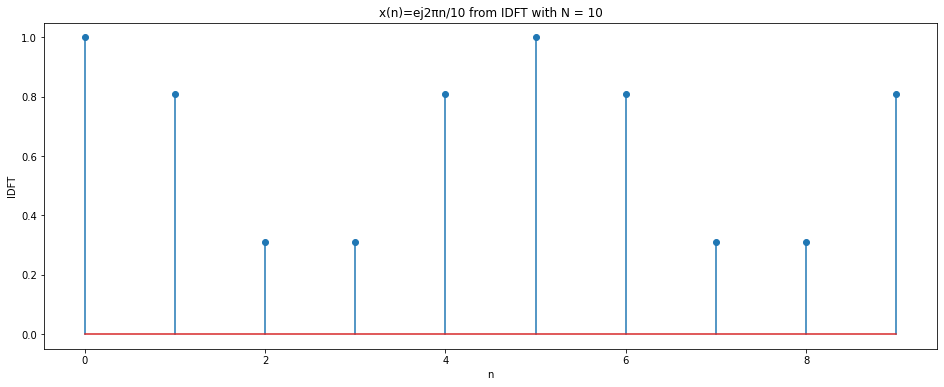

In [173]:
x_n3_idft = np.real(IDFTsum(X_dft3))
plt.title("x(n)=ej2πn/10 from IDFT with N = 10")
plt.ylabel("IDFT")
plt.xlabel("n")
plt.stem(np.abs(x_n3_idft))
plt.show()

<ipython-input-170-d6660ac8ebeb>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  x[n] += X[k] * np.exp((1j*2*np.pi*k*n)/N)
<ipython-input-174-e56450c0f13c>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(x_n4_idft))


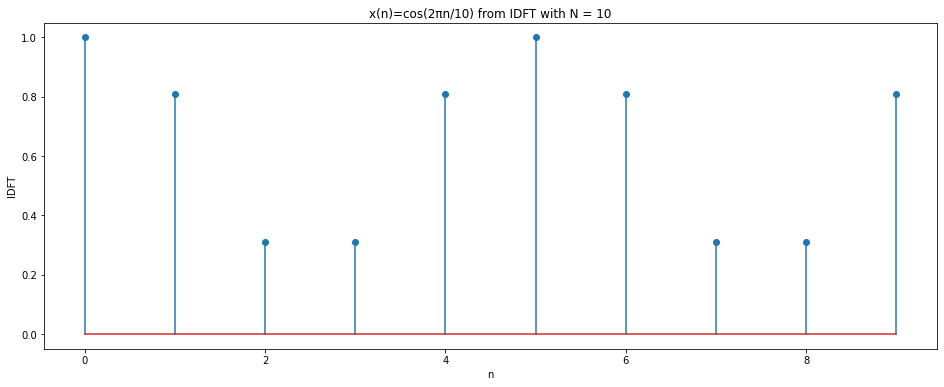

In [174]:
x_n4_idft = np.real(IDFTsum(X_dft4))
plt.title("x(n)=cos(2πn/10) from IDFT with N = 10")
plt.ylabel("IDFT")
plt.xlabel("n")
plt.stem(np.abs(x_n4_idft))
plt.show()

<h3 style="color:red;"><left>Exercise 3.3: Matrix Representation of the DFT</left></h3>

**1. Write a Python function for computing the $N\times N$ DFT matrix $A$ in equation (16).**

In [175]:
def DFTmatrix(N):
    """
    Parameters:
    ---
    N: N point DFT
    
    Returns:
    ---
    A: an N x N DFT matrix
    """
    A = np.zeros((N, N)).astype(complex)

    for k in range(N):
      for n in range(N):
        A[k][n] = np.exp(-1j*2*np.pi*k*n/N)

    return A

**2. Print out the matrix $A$ for $N=5$.**

In [176]:
# insert your code here
print(DFTmatrix(5))

[[ 1.        +0.j          1.        +0.j          1.        +0.j
   1.        +0.j          1.        +0.j        ]
 [ 1.        +0.j          0.30901699-0.95105652j -0.80901699-0.58778525j
  -0.80901699+0.58778525j  0.30901699+0.95105652j]
 [ 1.        +0.j         -0.80901699-0.58778525j  0.30901699+0.95105652j
   0.30901699-0.95105652j -0.80901699+0.58778525j]
 [ 1.        +0.j         -0.80901699+0.58778525j  0.30901699-0.95105652j
   0.30901699+0.95105652j -0.80901699-0.58778525j]
 [ 1.        +0.j          0.30901699+0.95105652j -0.80901699+0.58778525j
  -0.80901699-0.58778525j  0.30901699-0.95105652j]]


**3. Use the matrix $A$ to compute the DFT of the following signals.**

* $x(n)=\delta(n)\quad\text{for }N=10$
* $x(n)=1\quad\text{for }N=10$
* $x(n)=e^{j2\pi n/N}\quad\text{for }N=10$

In [206]:
# insert your code here
N = 10
n = np.linspace(0, N-1, N)
A = DFTmatrix(N)

x_n1 = (n == 0).astype(float)
x_n1_dft = np.dot(A, x_n1)

x_n2 = (n <= N-1).astype(float)
x_n2_dft = np.dot(A, x_n2)

x_n3 = np.exp(1j*2*np.pi*n/N)
x_n3_dft = np.dot(A, x_n3)


**4. Plot the magnitude plots of these 3 DFTs.**

<ipython-input-203-9d9d94120730>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(x_n1_dft))


<StemContainer object of 3 artists>

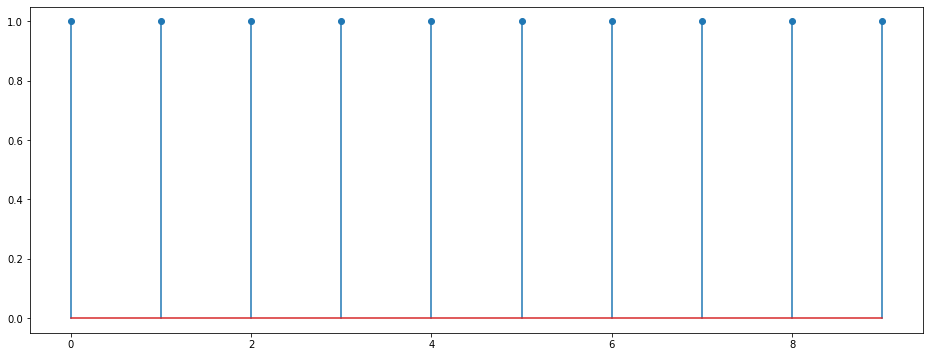

In [203]:
# the DFT of the first signal
plt.stem(np.abs(x_n1_dft))


<ipython-input-204-fe5b78a15fa7>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(x_n2_dft))


<StemContainer object of 3 artists>

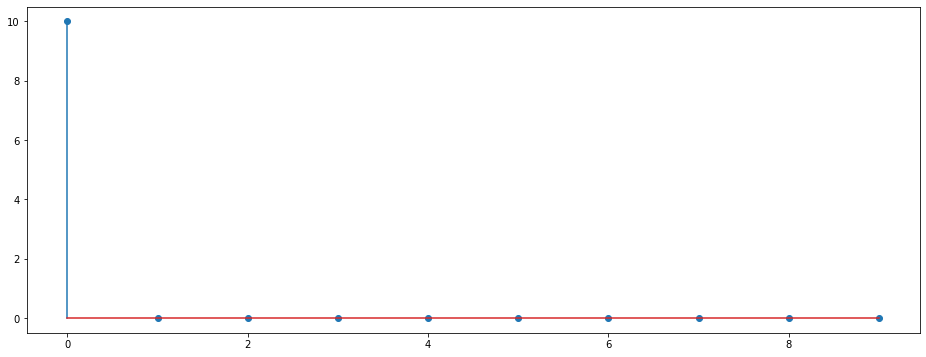

In [204]:
# the DFT of the second signal
plt.stem(np.abs(x_n2_dft))

<ipython-input-207-3c6410d419d8>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.abs(x_n3_dft))


<StemContainer object of 3 artists>

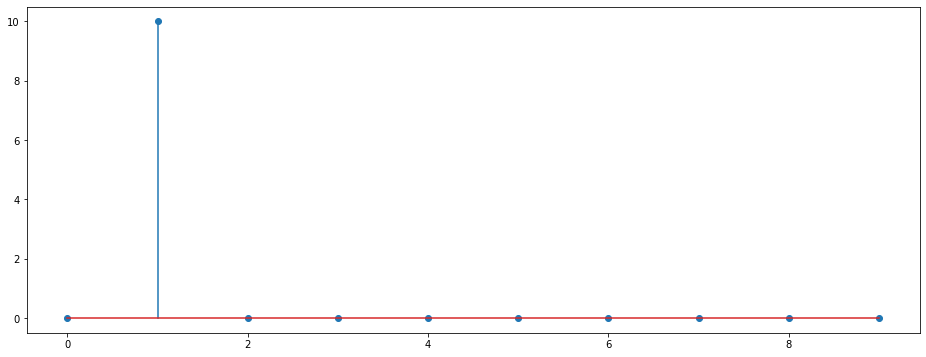

In [207]:
# the DFT of the third signal
plt.stem(np.abs(x_n3_dft))


**5. How many multiplies are required to compute an $N$ point DFT using the matrix method (Consider a multiply as the multiplication of either complex or real numbers.)**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.4: Matrix Representation of the Inverse DFT</left></h3>

**1. Write an analytical expression for the elements of the inverse DFT matrix ```B```, using
the form of equation (16).**

**2. Write a Python function for computing the $N\times N$ inverse DFT matrix $B$.**

In [195]:
def IDFTmatrix(N):
    """
    Parameters:
    ---
    N: N-point IDFT
    
    Returns:
    ---
    B: the N x N inverse DFT matrix
    """
    B = np.zeros((N, N)).astype(complex)

    for k in range(N):
      for n in range(N):
        B[k][n] = np.exp(1j*2*np.pi*k*n/N)

    return B / N

**3. Print out the matrix $B$ for $N=5$.**

In [196]:
# insert your code here
B = IDFTmatrix(5)
print(B)


[[ 0.2      +0.j          0.2      +0.j          0.2      +0.j
   0.2      +0.j          0.2      +0.j        ]
 [ 0.2      +0.j          0.0618034+0.1902113j  -0.1618034+0.11755705j
  -0.1618034-0.11755705j  0.0618034-0.1902113j ]
 [ 0.2      +0.j         -0.1618034+0.11755705j  0.0618034-0.1902113j
   0.0618034+0.1902113j  -0.1618034-0.11755705j]
 [ 0.2      +0.j         -0.1618034-0.11755705j  0.0618034+0.1902113j
   0.0618034-0.1902113j  -0.1618034+0.11755705j]
 [ 0.2      +0.j          0.0618034-0.1902113j  -0.1618034-0.11755705j
  -0.1618034+0.11755705j  0.0618034+0.1902113j ]]


**4. Compute the matrices $A$ for $N = 5$. Then compute and print out the elements of $C=BA$.**

In [198]:
# insert your code here
A = DFTmatrix(5)
C = np.dot(B, A)
print(C)


[[ 1.00000000e+00+0.00000000e+00j -5.06925946e-17-2.82989574e-17j
  -3.43077782e-18-6.00876543e-17j  2.43247978e-17-5.37102058e-17j
   1.03350850e-16-7.16211148e-17j]
 [-5.55111512e-17+0.00000000e+00j  1.00000000e+00+1.57264342e-17j
  -4.36462170e-17-1.79538929e-17j  7.53393892e-18-3.38631560e-17j
   0.00000000e+00-8.66862588e-17j]
 [-2.77555756e-17+5.55111512e-17j -5.07153260e-17+1.45495536e-17j
   1.00000000e+00+5.71902934e-18j -1.11022302e-16-4.06424922e-17j
  -2.84398114e-17-6.97595671e-17j]
 [ 2.77555756e-17+5.55111512e-17j  8.91608738e-18+7.85092079e-17j
  -1.11022302e-16+4.28879655e-17j  1.00000000e+00-3.47355611e-18j
  -5.61310314e-17-2.97966257e-17j]
 [ 1.59594560e-16+1.11022302e-16j  1.11022302e-16+7.49193927e-17j
  -1.87074505e-17+5.60915753e-17j -6.65293220e-17-3.57848204e-18j
   1.00000000e+00+2.90198749e-18j]]


**5. What form does $C$ have? Why does it have this form?**

C is an identity matrix... In linear algebra, we know A * A^(-1) = I

<h3 style="color:red;"><left>Exercise 3.5: Computation Time Comparison</left></h3>

**1. Compute the signal $x(n)=\cos(2\pi n/10)$ for $N=512$.**

In [210]:
# insert your code here
N = 512
n = np.linspace(0, N-1, N)
xn = np.cos(2*np.pi*n/N)


**2. Compute the matrix $A$ for $N=512$.**

In [209]:
# insert your code here
N = 512
A = DFTmatrix(N)


**3. Compare the computation time of `DFTsum(x)` with a matrix implementation ```X = A.dot(x)``` by using the *time* function from *time* library before and after  the program execution (See the example below). Do not include the computation of $A$ in your timing calculations.**

**Report the time required for each of the two implementations.**

```python
t1 = time.time()
# program execution
t2 = time.time()
print(f"time taken: {t2 - t1:.4f}")
```

In [216]:
# insert your code here
t1 = time.time()
xn_dft_sum = DFTsum(xn)
t2 = time.time()
print(f"Time taken for DFT sum: {t2 - t1:.4f}")

t1 = time.time()
xn_dft_matrix = np.dot(A, xn)
t2 = time.time()
print(f"Time taken for DFT matrix: {t2 - t1:.4f}")



Time taken for DFT sum: 1.1795
Time taken for DFT matrix: 0.0018


**4. Which method is faster? Which method requires less storage?**

The DFT matrix method is much faster but DFT sum method requires less storage. 